In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
img=cv2.imread('./test_images/MS-Dhoni-6.jpg')
img.shape

(669, 1200, 3)

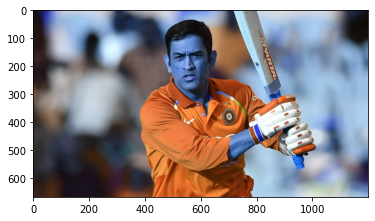

In [3]:
plt.imshow(img)

In [6]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(669, 1200)

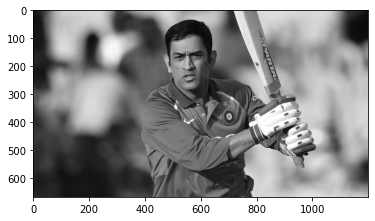

In [9]:
plt.imshow(gray,cmap='gray')

In [10]:
face_cascade= cv2.CascadeClassifier('./opencv/haarcascade/haarcascade_frontalface_default.xml')
eye_cascade= cv2.CascadeClassifier('./opencv/haarcascade/haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[468,  96, 179, 179]], dtype=int32)

In [11]:
(x,y,w,h)=faces[0]
(x,y,w,h)

(468, 96, 179, 179)

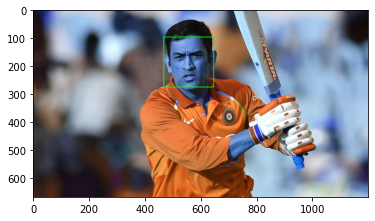

In [13]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(face_img)

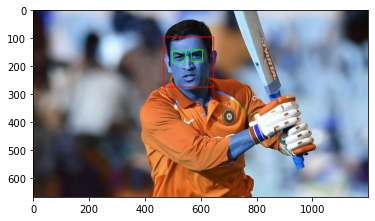

In [14]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

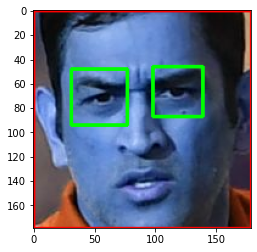

In [15]:
plt.imshow(roi_color,cmap='gray')

In [16]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

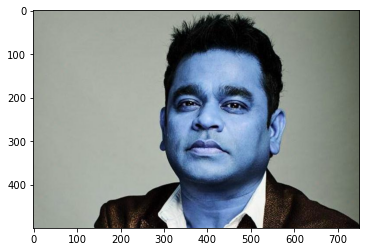

In [17]:
original_image = cv2.imread('./test_images/AR_Rahman.jpg')
plt.imshow(original_image)

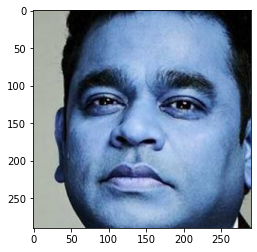

In [18]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/AR_Rahman.jpg')
plt.imshow(cropped_image)

In [53]:
path_to_data = "./datasets/"
path_to_cr_data = "./datasets/cropped/"

In [54]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [55]:
img_dirs

['./datasets/ar_rahman',
 './datasets/che_guevara',
 './datasets/dhoni',
 './datasets/messi',
 './datasets/obama']

In [56]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [57]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

ar_rahman
Generating cropped images in folder:  ./datasets/cropped/ar_rahman
che_guevara
Generating cropped images in folder:  ./datasets/cropped/che_guevara
dhoni
Generating cropped images in folder:  ./datasets/cropped/dhoni
messi
Generating cropped images in folder:  ./datasets/cropped/messi
obama
Generating cropped images in folder:  ./datasets/cropped/obama


In [58]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'ar_rahman': ['./datasets/cropped/ar_rahman\\ar_rahman1.png',
  './datasets/cropped/ar_rahman\\ar_rahman10.png',
  './datasets/cropped/ar_rahman\\ar_rahman11.png',
  './datasets/cropped/ar_rahman\\ar_rahman12.png',
  './datasets/cropped/ar_rahman\\ar_rahman13.png',
  './datasets/cropped/ar_rahman\\ar_rahman14.png',
  './datasets/cropped/ar_rahman\\ar_rahman15.png',
  './datasets/cropped/ar_rahman\\ar_rahman16.png',
  './datasets/cropped/ar_rahman\\ar_rahman17.png',
  './datasets/cropped/ar_rahman\\ar_rahman18.png',
  './datasets/cropped/ar_rahman\\ar_rahman19.png',
  './datasets/cropped/ar_rahman\\ar_rahman2.png',
  './datasets/cropped/ar_rahman\\ar_rahman20.png',
  './datasets/cropped/ar_rahman\\ar_rahman22.png',
  './datasets/cropped/ar_rahman\\ar_rahman23.png',
  './datasets/cropped/ar_rahman\\ar_rahman24.png',
  './datasets/cropped/ar_rahman\\ar_rahman25.png',
  './datasets/cropped/ar_rahman\\ar_rahman26.png',
  './datasets/cropped/ar_rahman\\ar_rahman29.png',
  './datasets/croppe

In [59]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'ar_rahman': 0, 'che_guevara': 1, 'dhoni': 2, 'messi': 3, 'obama': 4}

In [63]:
import pywt
def w2d(img,mode='haar',level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray/=255;
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H*=255;
    imArray_H=np.uint8(imArray_H)
    return imArray_H

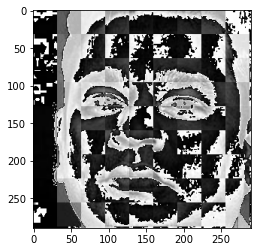

In [64]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [65]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [66]:
len(X[0])

4096

In [67]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(183, 4096)

In [68]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6739130434782609

In [70]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.45      0.75      0.56        12
           1       0.85      0.85      0.85        13
           2       0.50      0.12      0.20         8
           3       1.00      1.00      1.00         2
           4       0.89      0.73      0.80        11

    accuracy                           0.67        46
   macro avg       0.74      0.69      0.68        46
weighted avg       0.70      0.67      0.66        46



In [71]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [72]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.752116,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.576190,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.781217,{'logisticregression__C': 1}


In [75]:
best_estimators['svm'].score(X_test,y_test)

0.7391304347826086

In [76]:
best_estimators['random_forest'].score(X_test,y_test)

0.5434782608695652

In [77]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7608695652173914

In [78]:
best_clf = best_estimators['logistic_regression']

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  0,  1,  1,  0],
       [ 0, 10,  0,  3,  0],
       [ 1,  0,  4,  1,  2],
       [ 0,  0,  0,  2,  0],
       [ 0,  0,  1,  1,  9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

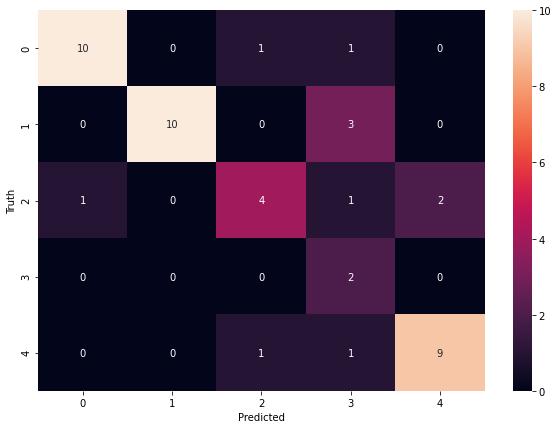

In [80]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [81]:

class_dict

{'ar_rahman': 0, 'che_guevara': 1, 'dhoni': 2, 'messi': 3, 'obama': 4}

In [82]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [83]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))